In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x_train = np.array(
    [
        [4.7],
        [2.4],
        [7.5],
        [7.1],
        [4.3],
        [7.8],
        [8.9],
        [5.2],
        [4.59],
        [2.1],
        [8],
        [5],
        [7.5],
        [5],
        [4],
        [8],
        [5.2],
        [4.9],
        [3],
        [4.7],
        [4],
        [4.8],
        [3.5],
        [2.1],
        [4.1],
    ],
    dtype=np.float32,
)

y_train = np.array(
    [
        [2.6],
        [1.6],
        [3.09],
        [2.4],
        [2.4],
        [3.3],
        [2.6],
        [1.96],
        [3.13],
        [1.76],
        [3.2],
        [2.1],
        [1.6],
        [2.5],
        [2.2],
        [2.75],
        [2.4],
        [1.8],
        [1],
        [2],
        [1.6],
        [2.4],
        [2.6],
        [1.5],
        [3.1],
    ],
    dtype=np.float32,
)

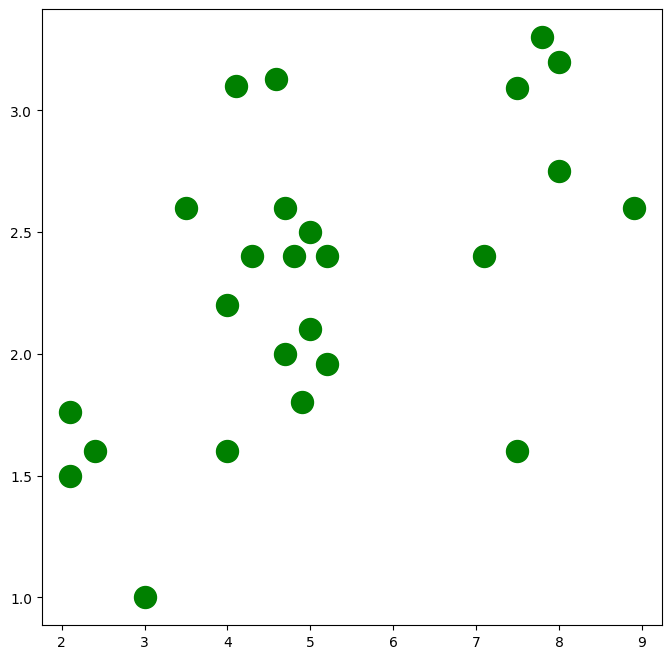

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c="green", s=250, label="Original Data")
plt.show()

In [17]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [18]:
x.size()

torch.Size([25, 1])

In [19]:
inp = 1
hidden = 5
out = 1

In [20]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hidden), torch.nn.ReLU(), torch.nn.Linear(hidden, out)
)

In [21]:
loss_fn = torch.nn.MSELoss(reduction="sum")

In [22]:
learning_rate = 1e-4

for i in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 68.0876235961914
1 55.358177185058594
2 45.08327102661133
3 36.852455139160156
4 30.321514129638672
5 25.193889617919922
6 21.212013244628906
7 18.153369903564453
8 15.82831859588623
9 14.078062057495117
10 12.772161483764648
11 11.805480003356934
12 11.09481143951416
13 10.575360298156738
14 10.197434425354004
15 9.923409461975098
16 9.725133895874023
17 9.581741333007812
18 9.477913856506348
19 9.402473449707031
20 9.347332000732422
21 9.306653022766113
22 9.276249885559082
23 9.25313663482666
24 9.235180854797363
25 9.220873832702637
26 9.209136962890625
27 9.199217796325684
28 9.19057846069336
29 9.182842254638672
30 9.175743103027344
31 9.169095039367676
32 9.162764549255371
33 9.156662940979004
34 9.150720596313477
35 9.14489459991455
36 9.139154434204102
37 9.133475303649902
38 9.127840995788574
39 9.12224292755127
40 9.116673469543457
41 9.111125946044922
42 9.105594635009766
43 9.100077629089355
44 9.094576835632324
45 9.089086532592773
46 9.083610534667969
47 9.078142166137

In [23]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1091],
        [1.4959],
        [2.8966],
        [2.7818],
        [2.0024],
        [2.9827],
        [3.2984],
        [2.2424],
        [2.0797],
        [1.4159],
        [3.0401],
        [2.1890],
        [2.8966],
        [2.1890],
        [1.9224],
        [3.0401],
        [2.2424],
        [2.1624],
        [1.6558],
        [2.1091],
        [1.9224],
        [2.1357],
        [1.7891],
        [1.4159],
        [1.9491]], grad_fn=<AddmmBackward0>)

In [24]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.1090648],
       [1.495862 ],
       [2.8965607],
       [2.7817557],
       [2.002421 ],
       [2.9826648],
       [3.2983782],
       [2.24237  ],
       [2.079738 ],
       [1.415879 ],
       [3.040067 ],
       [2.1890478],
       [2.8965607],
       [2.1890478],
       [1.9224379],
       [3.040067 ],
       [2.24237  ],
       [2.162387 ],
       [1.655828 ],
       [2.1090648],
       [1.9224379],
       [2.135726 ],
       [1.7891328],
       [1.415879 ],
       [1.949099 ]], dtype=float32)

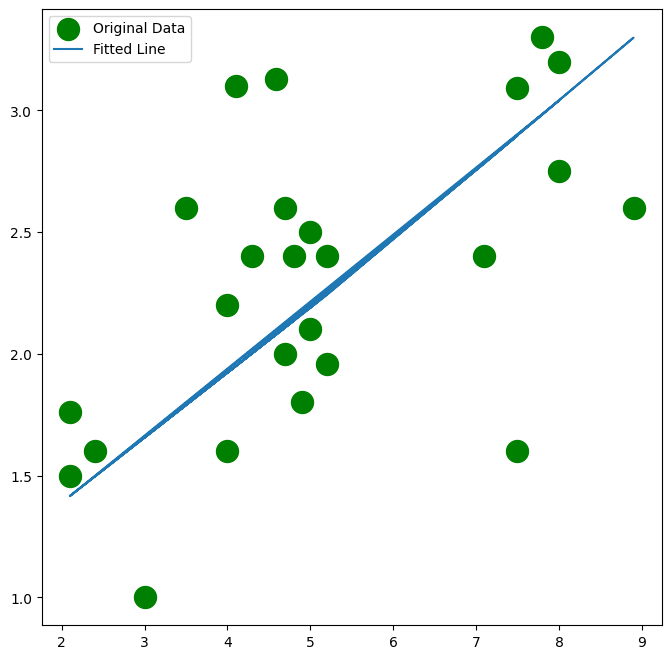

In [25]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c="green", s=250, label="Original Data")

plt.plot(x_train, predicted, label="Fitted Line")

plt.legend()

plt.show()

In [26]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hidden), torch.nn.ReLU(), torch.nn.Linear(hidden, out)
)

loss_fn = torch.nn.MSELoss(reduction="sum")

In [27]:
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

0 74.57684326171875
1 50.582603454589844
2 35.42155075073242
3 25.897153854370117
4 19.967876434326172
5 16.312959671020508
6 14.080756187438965
7 12.728123664855957
8 11.913366317749023
9 11.42440128326416
10 11.131190299987793
11 10.954842567443848
12 10.847887992858887
13 10.781967163085938
14 10.740238189697266
15 10.712732315063477
16 10.693580627441406
17 10.67932415008545
18 10.667935371398926
19 10.65822982788086
20 10.649515151977539
21 10.641380310058594
22 10.63359260559082
23 10.626009941101074
24 10.61855411529541
25 10.611176490783691
26 10.603849411010742
27 10.5965576171875
28 10.5892915725708
29 10.58204460144043
30 10.574817657470703
31 10.567602157592773
32 10.560401916503906
33 10.553216934204102
34 10.546040534973145
35 10.538880348205566
36 10.531732559204102
37 10.52459716796875
38 10.517472267150879
39 10.510363578796387
40 10.503264427185059
41 10.496175765991211
42 10.489102363586426
43 10.482041358947754
44 10.474989891052246
45 10.467951774597168
46 10.46092

In [28]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0647],
        [1.3344],
        [2.9537],
        [2.8267],
        [1.9377],
        [3.0489],
        [3.3982],
        [2.2234],
        [2.0298],
        [1.2392],
        [3.1124],
        [2.1599],
        [2.9537],
        [2.1599],
        [1.8424],
        [3.1124],
        [2.2234],
        [2.1282],
        [1.5249],
        [2.0647],
        [1.8424],
        [2.0964],
        [1.6837],
        [1.2392],
        [1.8742]], grad_fn=<AddmmBackward0>)

In [29]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.0646863],
       [1.3344465],
       [2.9536738],
       [2.8266754],
       [1.9376881],
       [3.0489228],
       [3.3981676],
       [2.223434 ],
       [2.0297618],
       [1.2391977],
       [3.1124213],
       [2.1599348],
       [2.9536738],
       [2.1599348],
       [1.8424392],
       [3.1124213],
       [2.223434 ],
       [2.1281855],
       [1.5249438],
       [2.0646863],
       [1.8424392],
       [2.0964355],
       [1.6836915],
       [1.2391977],
       [1.8741889]], dtype=float32)

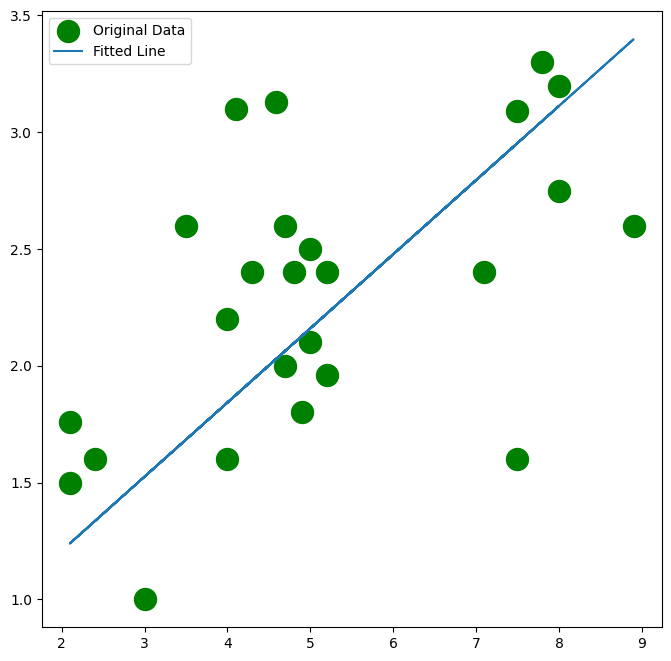

In [30]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c="green", s=250, label="Original Data")

plt.plot(x_train, predicted, label="Fitted Line")

plt.legend()

plt.show()